In [15]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
import pandas as pd

file_dir = "/data03/sunyi/time_constrained_cot/outputs/1_10"

o1_like_models = [
    "Qwen/QwQ-32B-Preview", 
    "NovaSky-AI/Sky-T1-32B-Preview", 
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
]

no_o1_models = [
    "Qwen/Qwen2.5-32B-Instruct", 
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
]

model_list = o1_like_models + no_o1_models

DEEPSEEK_R1_DISTILL_PROMP_LIST = [ "-sbs", "-sbs-hard"]

PROMP_LIST = [ "-aav", "-c2f", "-sbs", "-direct", "-quick", "-aav-hard", "-c2f-hard", "-sbs-hard", "-direct-hard", "-quick-hard"]


In [16]:
MODEL_SERIES_MAP = {
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in DEEPSEEK_R1_DISTILL_PROMP_LIST],
}

In [17]:

def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 50):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 601, 25):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
        return budget_list

In [18]:
dataset = "math500"
something = "_-1_seed0_t0.0_s0_e-1"

In [19]:
model_acc_dicts = {}
prompt_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

display(model_acc_dicts)

{'Qwen/QwQ-32B-Preview': {'qwen-aav': [35.0,
   35.8,
   36.8,
   37.2,
   39.4,
   40.4,
   43.2,
   44.6,
   45.2,
   47.4,
   49.0,
   51.0,
   52.8,
   54.4,
   55.8,
   56.8,
   58.6,
   61.2,
   61.6,
   62.2,
   63.6,
   64.6,
   65.4,
   65.4,
   68.2,
   68.8,
   71.8,
   72.8,
   73.4,
   75.0,
   76.0,
   76.6,
   77.4,
   77.6,
   77.8,
   79.2,
   80.8,
   81.0,
   81.6,
   81.6,
   81.2,
   80.6,
   82.4,
   82.0,
   82.8,
   83.2,
   83.4,
   83.0,
   83.2,
   83.4,
   84.4,
   85.2,
   85.0,
   85.0,
   85.0,
   84.6,
   85.6,
   85.6,
   85.4,
   85.0],
  'qwen-c2f': [32.8,
   36.6,
   37.4,
   38.6,
   40.6,
   41.6,
   44.8,
   47.8,
   48.2,
   51.2,
   54.0,
   54.4,
   55.0,
   56.2,
   58.0,
   59.0,
   61.8,
   62.6,
   62.4,
   65.6,
   65.8,
   66.8,
   68.0,
   68.6,
   69.0,
   71.4,
   71.6,
   73.2,
   73.2,
   75.4,
   76.2,
   78.0,
   78.6,
   78.8,
   79.2,
   79.2,
   80.0,
   80.2,
   80.8,
   80.4,
   81.0,
   81.0,
   82.2,
   83.0,
   82.6,
   82.

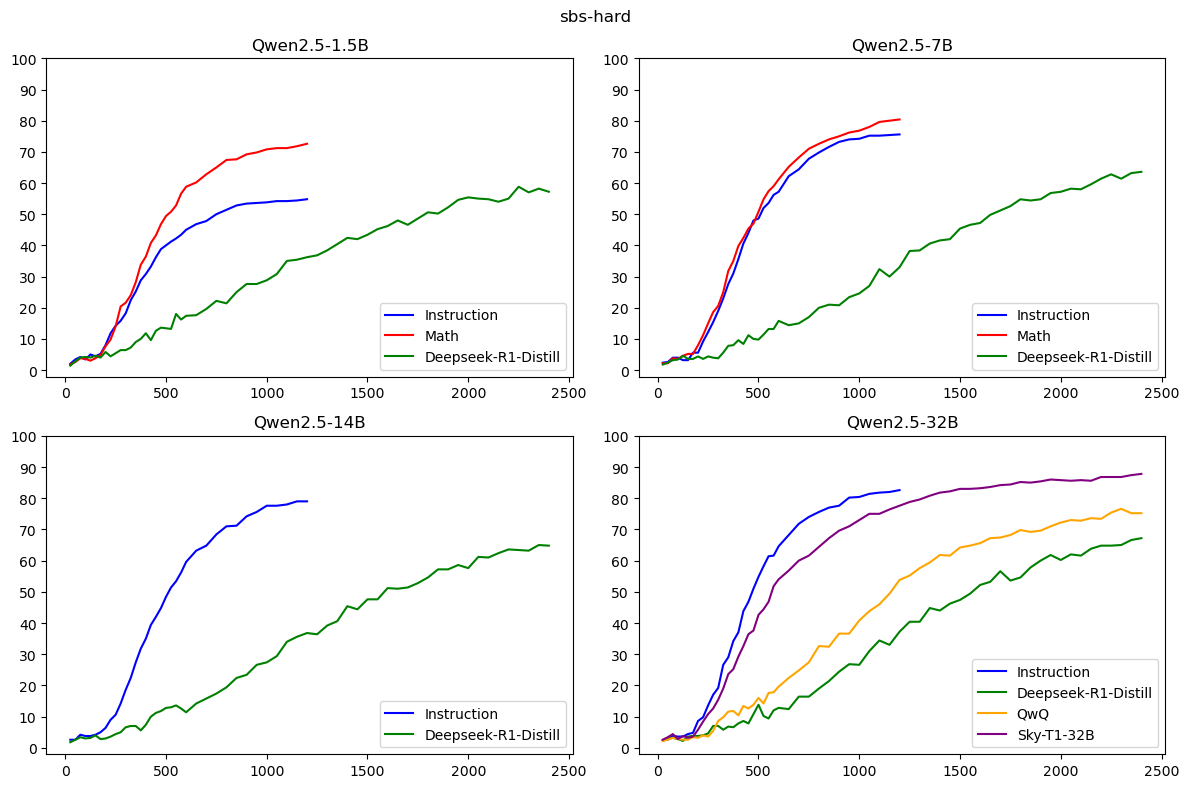

In [20]:
# plot for qwen2.5-1.5B,7B,14B,32B
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot for qwen2.5-1.5B, include instruction, math and deepseek-r1-distill
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]["qwen-sbs-hard"], label="Instruction", color="blue")
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-1.5B-Instruct"]["qwen-math-sbs-hard"], label="Math", color="red")
axs[0, 0].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"]["deepseek-r1-distill-sbs-hard"], label="Deepseek-R1-Distill", color="green")
axs[0, 0].legend(loc="lower right")
axs[0, 0].set_title("Qwen2.5-1.5B")
axs[0, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-7B, include instruction, math and deepseek-r1-distill
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-sbs-hard"], label="Instruction", color="blue")
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-sbs-hard"], label="Math", color="red")
axs[0, 1].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]["deepseek-r1-distill-sbs-hard"], label="Deepseek-R1-Distill", color="green")
axs[0, 1].legend(loc="lower right")
axs[0, 1].set_title("Qwen2.5-7B")
axs[0, 1].set_yticks(range(0, 101, 10))

# plot for qwen2.5-14B, include instruction and deepseek-r1-distill
axs[1, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-14B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]["qwen-sbs-hard"], label="Instruction", color="blue")
axs[1, 0].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"]["deepseek-r1-distill-sbs-hard"], label="Deepseek-R1-Distill", color="green")
axs[1, 0].legend(loc="lower right")
axs[1, 0].set_title("Qwen2.5-14B")
axs[1, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-32B, include instruction, deepseek-r1-distill, QwQ and Sky-T1-32B
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-32B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-sbs-hard"], label="Instruction", color="blue")
axs[1, 1].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"]["deepseek-r1-distill-sbs-hard"], label="Deepseek-R1-Distill", color="green")
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/QwQ-32B-Preview"), model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-sbs-hard"], label="QwQ", color="orange")
axs[1, 1].plot(gen_budget_list(1, dataset, "NovaSky-AI/Sky-T1-32B-Preview"), model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-sbs-hard"], label="Sky-T1-32B", color="purple")
axs[1, 1].legend(loc="lower right")
axs[1, 1].set_title("Qwen2.5-32B")
axs[1, 1].set_yticks(range(0, 101, 10))

# set title for the whole figure
fig.suptitle("sbs-hard")
fig.tight_layout()
plt.show()


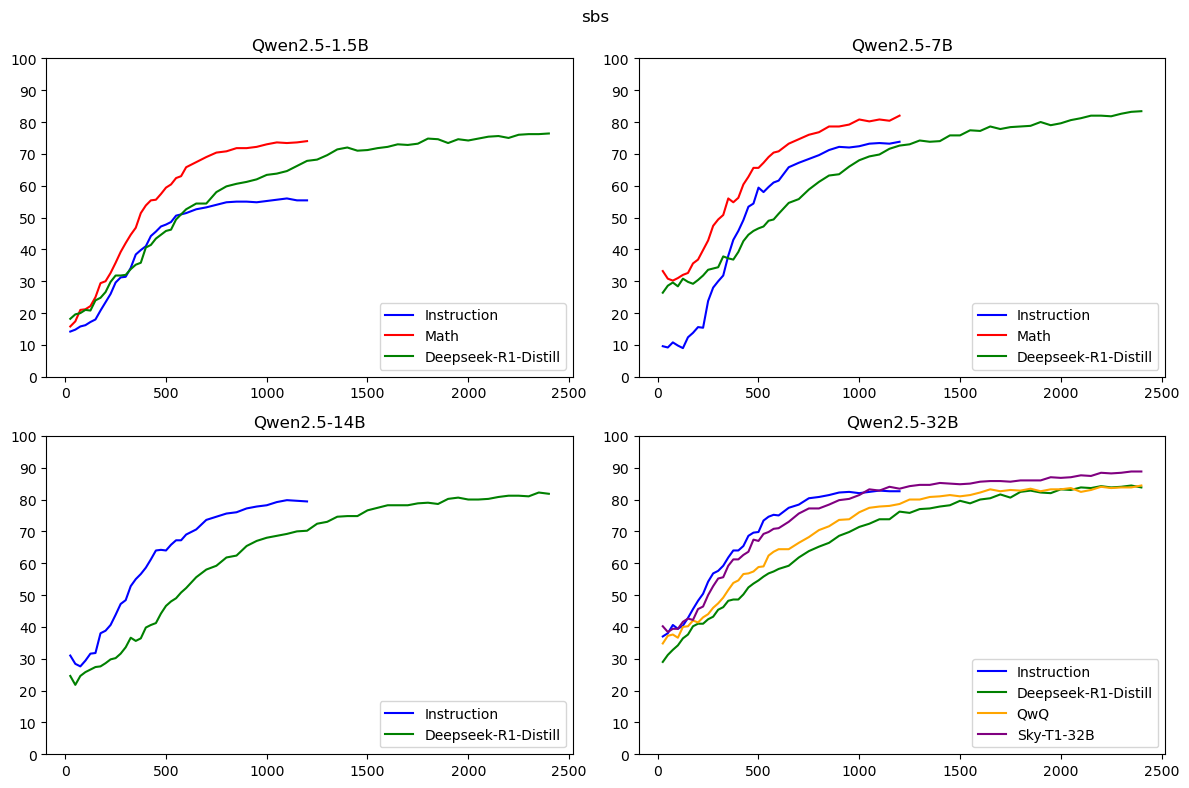

In [21]:
# plot for qwen2.5-1.5B,7B,14B,32B
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot for qwen2.5-1.5B, include instruction, math and deepseek-r1-distill
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]["qwen-sbs"], label="Instruction", color="blue")
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-1.5B-Instruct"]["qwen-math-sbs"], label="Math", color="red")
axs[0, 0].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"]["deepseek-r1-distill-sbs"], label="Deepseek-R1-Distill", color="green")
axs[0, 0].legend(loc="lower right")
axs[0, 0].set_title("Qwen2.5-1.5B")
axs[0, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-7B, include instruction, math and deepseek-r1-distill
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-sbs"], label="Instruction", color="blue")
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-sbs"], label="Math", color="red")
axs[0, 1].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]["deepseek-r1-distill-sbs"], label="Deepseek-R1-Distill", color="green")
axs[0, 1].legend(loc="lower right")
axs[0, 1].set_title("Qwen2.5-7B")
axs[0, 1].set_yticks(range(0, 101, 10))

# plot for qwen2.5-14B, include instruction and deepseek-r1-distill
axs[1, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-14B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]["qwen-sbs"], label="Instruction", color="blue")
axs[1, 0].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"]["deepseek-r1-distill-sbs"], label="Deepseek-R1-Distill", color="green")
axs[1, 0].legend(loc="lower right")
axs[1, 0].set_title("Qwen2.5-14B")
axs[1, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-32B, include instruction, deepseek-r1-distill, QwQ and Sky-T1-32B
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-32B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-sbs"], label="Instruction", color="blue")
axs[1, 1].plot(gen_budget_list(1, dataset, "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"), model_acc_dicts["deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"]["deepseek-r1-distill-sbs"], label="Deepseek-R1-Distill", color="green")
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/QwQ-32B-Preview"), model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-sbs"], label="QwQ", color="orange")
axs[1, 1].plot(gen_budget_list(1, dataset, "NovaSky-AI/Sky-T1-32B-Preview"), model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-sbs"], label="Sky-T1-32B", color="purple")
axs[1, 1].legend(loc="lower right")
axs[1, 1].set_title("Qwen2.5-32B")
axs[1, 1].set_yticks(range(0, 101, 10))

fig.suptitle("sbs")
fig.tight_layout()
plt.show()


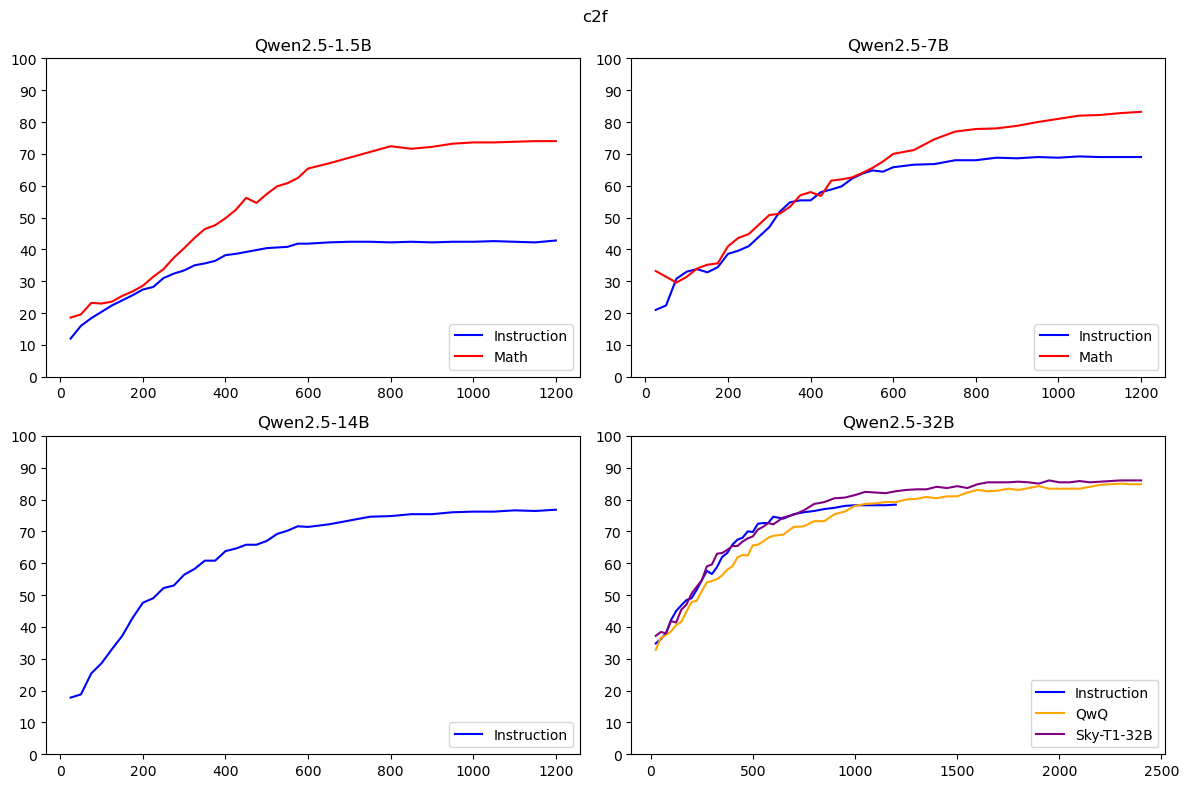

In [22]:
# plot for qwen2.5-1.5B,7B,14B,32B
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot for qwen2.5-1.5B, include instruction, math and deepseek-r1-distill
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]["qwen-c2f"], label="Instruction", color="blue")
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-1.5B-Instruct"]["qwen-math-c2f"], label="Math", color="red")
axs[0, 0].legend(loc="lower right")
axs[0, 0].set_title("Qwen2.5-1.5B")
axs[0, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-7B, include instruction, math and deepseek-r1-distill
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-c2f"], label="Instruction", color="blue")
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-c2f"], label="Math", color="red")

axs[0, 1].legend(loc="lower right")
axs[0, 1].set_title("Qwen2.5-7B")
axs[0, 1].set_yticks(range(0, 101, 10))

# plot for qwen2.5-14B, include instruction and deepseek-r1-distill
axs[1, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-14B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]["qwen-c2f"], label="Instruction", color="blue")
axs[1, 0].legend(loc="lower right")
axs[1, 0].set_title("Qwen2.5-14B")
axs[1, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-32B, include instruction, deepseek-r1-distill, QwQ and Sky-T1-32B
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-32B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-c2f"], label="Instruction", color="blue")
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/QwQ-32B-Preview"), model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-c2f"], label="QwQ", color="orange")
axs[1, 1].plot(gen_budget_list(1, dataset, "NovaSky-AI/Sky-T1-32B-Preview"), model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-c2f"], label="Sky-T1-32B", color="purple")
axs[1, 1].legend(loc="lower right")
axs[1, 1].set_title("Qwen2.5-32B")
axs[1, 1].set_yticks(range(0, 101, 10))

fig.suptitle("c2f")
fig.tight_layout()
plt.show()


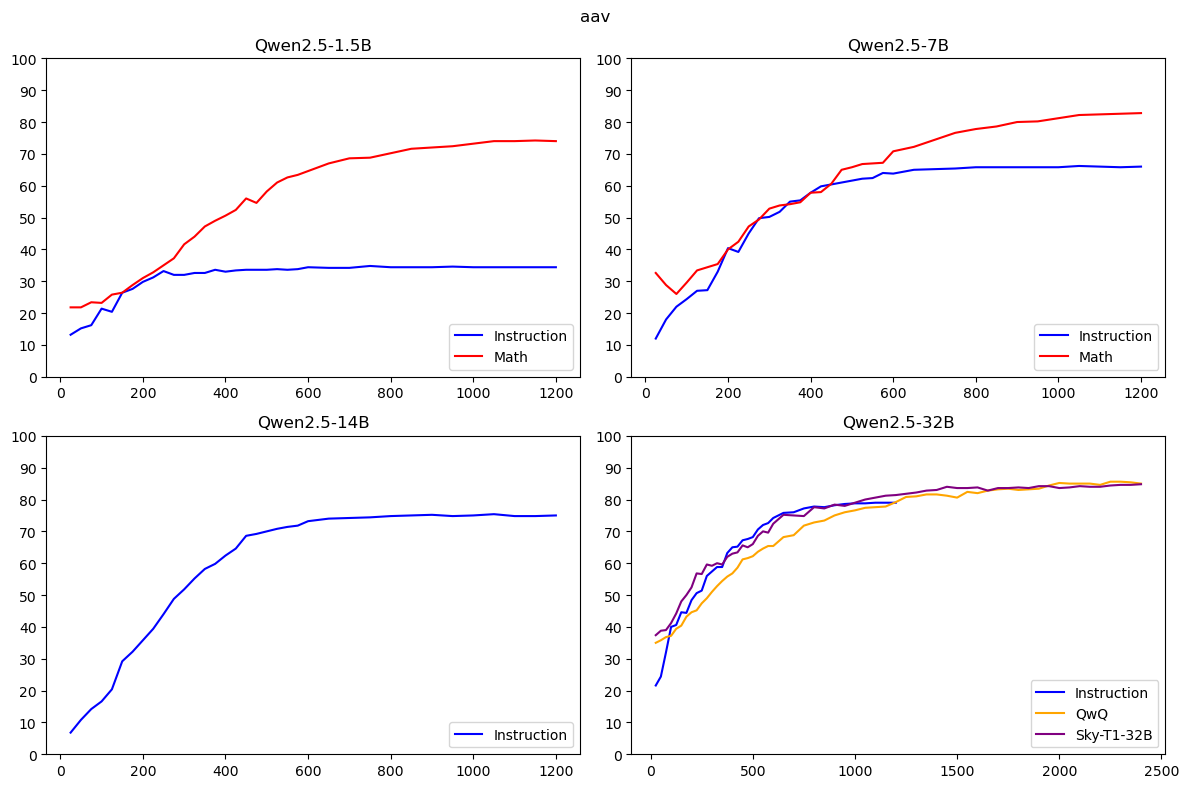

In [23]:
# plot for qwen2.5-1.5B,7B,14B,32B
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot for qwen2.5-1.5B, include instruction, math and deepseek-r1-distill
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]["qwen-aav"], label="Instruction", color="blue")
axs[0, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-1.5B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-1.5B-Instruct"]["qwen-math-aav"], label="Math", color="red")
axs[0, 0].legend(loc="lower right")
axs[0, 0].set_title("Qwen2.5-1.5B")
axs[0, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-7B, include instruction, math and deepseek-r1-distill
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]["qwen-aav"], label="Instruction", color="blue")
axs[0, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-Math-7B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-Math-7B-Instruct"]["qwen-math-aav"], label="Math", color="red")

axs[0, 1].legend(loc="lower right")
axs[0, 1].set_title("Qwen2.5-7B")
axs[0, 1].set_yticks(range(0, 101, 10))

# plot for qwen2.5-14B, include instruction and deepseek-r1-distill
axs[1, 0].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-14B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]["qwen-aav"], label="Instruction", color="blue")
axs[1, 0].legend(loc="lower right")
axs[1, 0].set_title("Qwen2.5-14B")
axs[1, 0].set_yticks(range(0, 101, 10))

# plot for qwen2.5-32B, include instruction, deepseek-r1-distill, QwQ and Sky-T1-32B
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/Qwen2.5-32B-Instruct"), model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]["qwen-aav"], label="Instruction", color="blue")
axs[1, 1].plot(gen_budget_list(1, dataset, "Qwen/QwQ-32B-Preview"), model_acc_dicts["Qwen/QwQ-32B-Preview"]["qwen-aav"], label="QwQ", color="orange")
axs[1, 1].plot(gen_budget_list(1, dataset, "NovaSky-AI/Sky-T1-32B-Preview"), model_acc_dicts["NovaSky-AI/Sky-T1-32B-Preview"]["qwen-aav"], label="Sky-T1-32B", color="purple")
axs[1, 1].legend(loc="lower right")
axs[1, 1].set_title("Qwen2.5-32B")
axs[1, 1].set_yticks(range(0, 101, 10))

fig.suptitle("aav")
fig.tight_layout()
plt.show()

